In [14]:
import warnings
warnings.filterwarnings('ignore')

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from bettermdptools.utils.plots import Plots
import matplotlib.pyplot as plt
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL

In [180]:
map_size = 16

In [168]:
def extractTotalReward(env,policy):
    # Reset the environment to the initial state
    state, pi = env.reset()
    print(state)
    # Initialize total reward
    total_reward = 0
   
    # Simulate the agent's actions using the policy pi_qlearning
    while True:
        action = policy[state]
        next_state, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        state = next_state
        if done:
            break
            
    return total_reward


In [169]:
def checkGoalReached(environment, policy):
    goal_state = environment.observation_space.n - 1  # Goal state index
    current_state, info = environment.reset()  # Start from the initial state
    steps = 0
    while current_state != goal_state:
        action = policy[current_state]
        next_state, reward, terminated, truncated, _ = environment.step(action)
        current_state = next_state
        steps += 1
        if truncated:  # Agent fell into a hole
            print("Agent fell into a hole. Goal not reached.")
            break

    if current_state == goal_state:
        print("Agent reached the goal in", steps, "steps.")

In [181]:
#env = gym.make('FrozenLake-v1',is_slippery=False)
env = gym.make('FrozenLake-v1',desc=generate_random_map(size=map_size), is_slippery=True)

In [182]:
learner = RL(env)
Q, V_qlearning, pi_qlearning, Q_track, pi_track  = learner.q_learning(n_episodes = 100000)

runtime = 54.60 seconds


In [172]:
print(pi_qlearning)

{0: 2, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 1, 10: 2, 11: 1, 12: 0, 13: 3, 14: 3, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 0, 21: 0, 22: 2, 23: 3, 24: 1, 25: 1, 26: 3, 27: 3, 28: 0, 29: 0, 30: 0, 31: 0, 32: 3, 33: 0, 34: 0, 35: 2, 36: 2, 37: 1, 38: 0, 39: 0, 40: 0, 41: 2, 42: 1, 43: 0, 44: 2, 45: 1, 46: 0, 47: 0, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 0}


In [183]:
checkGoalReached(env, pi_qlearning)

Agent fell into a hole. Goal not reached.


In [184]:
totalReward = extractTotalReward(env, pi_qlearning)
print(totalReward)

0


KeyboardInterrupt: 

In [177]:
print(pi_qlearning)

{0: 2, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 1, 10: 2, 11: 1, 12: 0, 13: 3, 14: 3, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 0, 21: 0, 22: 2, 23: 3, 24: 1, 25: 1, 26: 3, 27: 3, 28: 0, 29: 0, 30: 0, 31: 0, 32: 3, 33: 0, 34: 0, 35: 2, 36: 2, 37: 1, 38: 0, 39: 0, 40: 0, 41: 2, 42: 1, 43: 0, 44: 2, 45: 1, 46: 0, 47: 0, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 2, 58: 2, 59: 2, 60: 2, 61: 2, 62: 2, 63: 0}


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(V_qlearning)
plt.xlabel('States')
plt.ylabel('Value')
plt.title('Value Function learned during Q-learning')
plt.show()

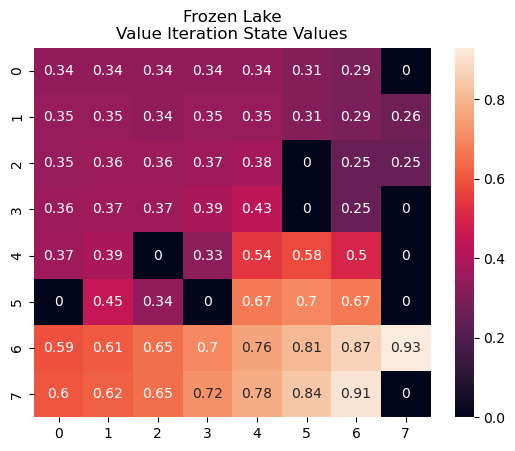

In [179]:
size=(map_size,map_size)
Plots.values_heat_map(V_qlearning, "Frozen Lake\nValue Iteration State Values", size)

In [96]:
Q_track.shape

(100000, 64, 4)

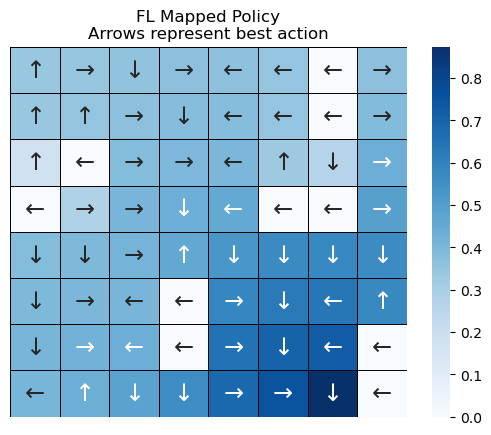

In [140]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(8,8)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(pi_qlearning, V_qlearning, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

In [160]:
test_rewards = TestEnv.test_env(env=env, n_iters=10000, render=False, pi=pi_qlearning, user_input=False)
# print(np.mean(test_scores_pi))
print((sum(test_rewards)/len(test_rewards)) * 100)
test_rewards

99.67


array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_rewards)
plt.xlabel('Iterations')
plt.ylabel('Total Reward')
plt.title('Total Reward per Iteration')
plt.grid(True)
plt.show()